### Artificial Intelligence Project: Convolutional Neural Network
<br>
Fiorella Averina Gunawan <br>
19/443579/TK/48775

Dataset: Brain Tumor MRI Dataset <br>
Taken from Kaggle, link: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset

In [2]:
##Importing libraries
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import numpy as np


from torchvision import datasets, transforms, models 
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data import DataLoader


## 1. Loading and Normalizing Data

In [3]:
#Defining the transformation
transform = transforms.Compose(
    [transforms.Resize((150,150)), #Resizing the image so that they all have the same size
    transforms.ToTensor(), #0-255 to 0-1, numpy to tensor
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) 
     #columns = RGB channel, row = mean and deviation
     # 0-1 to [-1, 1], formula is (x-mean)/std

batch_size = 16 

#Importing training and testing data
trainset = datasets.ImageFolder(root='brain tumor dataset/Training', transform=transform)
trainloader = DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = datasets.ImageFolder(root='brain tumor dataset/Testing', transform=transform)
testloader = DataLoader(testset, batch_size=batch_size,
                                         shuffle=True, num_workers=2)

#Defining the classes
classes = ('glioma', 'meningioma', 'notumor', 'pituitary')

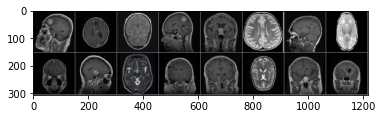

meningioma glioma notumor meningioma pituitary notumor notumor notumor glioma glioma notumor glioma pituitary notumor pituitary glioma


In [4]:
import matplotlib.pyplot as plt


# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

## 2. Defining A Convolutional Neural Network


In [5]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        #Input shape = (16, 3, 150, 150)
        # 16 = batch size; 3 = RGB, 150 x 150 = pixel
        self.conv1 = nn.Conv2d(3, 16, 5, padding = 2)
        #Shape = (16, 16, 150, 150)
        self.pool1 = nn.MaxPool2d(2, 2) #Reduce image size by 2
        #W2 = (W1-F)/S+1
        #H2 = (H1-F)/S+1
        #D2 = D1
        #Shape = (16, 16, 75, 75)

        self.conv2 = nn.Conv2d(16, 64, 5, padding = 2)
        #Shape = (16, 64, 75, 75)
        self.pool2 = nn.MaxPool2d(3,3)
        #Shape = (16, 64, 25, 25)

        self.conv3 = nn.Conv2d(64, 128, 5, padding = 2)
        self.fc1 = nn.Linear(128 * 25 * 25, 4) 
    

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x))) #Layer operation: convolution 1 -> reLU -> max pooling 1
        x = self.pool2(F.relu(self.conv2(x))) #Layer operation: convolution 2 -> reLU -> max pooling 3
        x = F.relu(self.conv3(x)) #Layer operation: convolution 3 -> reLU
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.fc1(x) #Fully connected layer: linear
        return x


net = Net()

## 3. Defining A Loss Function and Optimizer

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## 4. Training the Network

In [8]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 10 == 9:    # print every 10 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 10:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,    10] loss: 0.514
[1,    20] loss: 0.424
[1,    30] loss: 0.439
[1,    40] loss: 0.599
[1,    50] loss: 0.435
[1,    60] loss: 0.399
[1,    70] loss: 0.470
[1,    80] loss: 0.394
[1,    90] loss: 0.483
[1,   100] loss: 0.456
[1,   110] loss: 0.364
[1,   120] loss: 0.409
[1,   130] loss: 0.325
[1,   140] loss: 0.333
[1,   150] loss: 0.389
[1,   160] loss: 0.354
[1,   170] loss: 0.347
[1,   180] loss: 0.472
[1,   190] loss: 0.491
[1,   200] loss: 0.391
[1,   210] loss: 0.403
[1,   220] loss: 0.343
[1,   230] loss: 0.331
[1,   240] loss: 0.300
[1,   250] loss: 0.322
[1,   260] loss: 0.285
[1,   270] loss: 0.418
[1,   280] loss: 0.451
[1,   290] loss: 0.433
[1,   300] loss: 0.438
[1,   310] loss: 0.424
[1,   320] loss: 0.383
[1,   330] loss: 0.394
[1,   340] loss: 0.324
[1,   350] loss: 0.507
[2,    10] loss: 0.293
[2,    20] loss: 0.327
[2,    30] loss: 0.382
[2,    40] loss: 0.363
[2,    50] loss: 0.406
[2,    60] loss: 0.333
[2,    70] loss: 0.342
[2,    80] loss: 0.375
[2,    90] 

In [9]:
#Saving trained model
PATH = './trained_net.pth'
torch.save(net.state_dict(), PATH)

## 5. Testing the Network on the Test Data

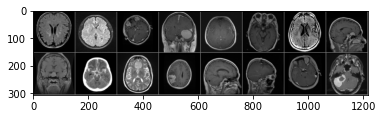

GroundTruth:  notumor notumor glioma meningioma notumor pituitary notumor meningioma pituitary notumor meningioma meningioma pituitary glioma pituitary meningioma


In [10]:
# Display an image from the test set
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [11]:
#Load saved model
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [12]:
#Generating output
outputs = net(images)

In [13]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(batch_size)))

Predicted:  notumor notumor glioma meningioma notumor pituitary notumor meningioma pituitary notumor meningioma meningioma pituitary glioma pituitary meningioma


In [14]:
#Calculating accuracy for the whole dataset
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 1311 test images: {100 * correct // total} %')

Accuracy of the network on the 1311 test images: 94 %


In [15]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: glioma is 80.7 %
Accuracy for class: meningioma is 96.1 %
Accuracy for class: notumor is 99.3 %
Accuracy for class: pituitary is 98.3 %
